In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Challenger Disaster Example

We are interested in how the probability of failure in a given O-ring is related to the launch temperature and predicting that probability when the temperature is 31°F.

In [12]:
ring = pd.read_csv("./data/orings.txt", sep='\t')
ring['damage6'] = ring.damage/6
ring.head()

,temp,damage,damage6
1,53,5,0.833333
2,57,1,0.166667
3,58,1,0.166667
4,63,1,0.166667
5,66,0,0.000000


If we first perorm a linear regression and plot the fitted line, we see there are __several problems with this apprach__ most ovious from the plot is that it can predict probabilitys greater than one or less than 1.However, it doesnot seem credible that these probabilities will be exactly 0 or 1.

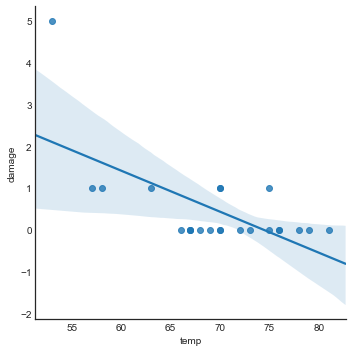

In [21]:
sns.lmplot(x= 'temp', y= 'damage', data=ring, logistic=False)

Also there appears to be a variance appears to be violated under the linear model assumption in which is not a violation under the binomial distribution. 

clearly this data is not suited for a linear model, its ibetter to develop a model that id directly suite for binomial data. However we will attempt several models:

1. Logit: $\Pr(Y=1 \mid X) = [1 + e^{-X'\beta}]^{-1}$
2. Probit: $\Pr(Y=1 \mid X) = \Phi(X'\beta)$ _(Cumulative normal pdf)_
3. Complementary log-log: 

### binomial Regression Model

$f(x)=\dfrac{n!}{x!(n-x)!}π^x(1-π)^{n-x}\qquad \text{for }x=0,1,2,\ldots,n$

In [45]:
y_data= ring.damage6
x_data= sm.add_constant(ring.temp)

model = sm.Logit(y_data, x_data)
model_fit = model.fit()

print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.109019
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                damage6   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Aug 2019   Pseudo R-squ.:                  0.2671
Time:                        16:35:20   Log-Likelihood:                -2.5074
converged:                       True   LL-Null:                       -3.4215
                                        LLR p-value:                    0.1764
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6630      8.074      1.444      0.149      -4.162      27.488
temp          -0.2162      0.

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The coefficents for the output are: y = 11.66 -0.216(temp). 

Logit fit to the data:

Notice how the logit fit tends asympototically towards zero and one at high and low temperatures

In [33]:
k = list(model_fit.predict())

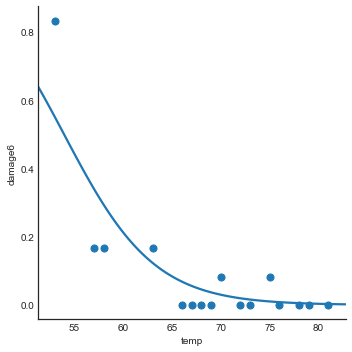

In [43]:
sns.lmplot(x= 'temp', y= 'damage6', data=ring,x_estimator=np.mean, ci=None, logistic=True)
#sns.regplot(x= 'temp', y= 'damage6', data=ring, logistic=True, ci=None)

### Probit

Probit: $\Pr(Y=1 \mid X) = \Phi(X'\beta)$ _(Cumulative normal pdf)_

http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Probit.html



In [54]:
y_data= ring.damage6
x_data= sm.add_constant(ring.temp)

probit_model = sm.GLM(y_data, x_data, 
                      family=sm.families.Binomial(link=sm.genmod.families.links.probit))

probit_model_fit = probit_model.fit()
print(probit_model_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                damage6   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.7114
Date:                Thu, 01 Aug 2019   Deviance:                       3.0218
Time:                        16:42:21   Pearson chi2:                     4.86
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5915      4.190      1.334      0.182      -2.621      13.804
temp          -0.1058      0.065     -1.626      0.1

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
